## Importe

### Importieren benötigter Module und Plot-Einstellungen setzen.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings; warnings.simplefilter('ignore')
sns.set()

## Datensatz laden

### Datensatz "Boston house prices" laden und analysieren.

In [2]:
boston = load_boston()

In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Datensatz splitten

### Datensatz aufteilen in Trainingsdaten und Testdaten.

In [6]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='MEDV')

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Visualisieren

### Zufällig ausgewählte Features plotten.

In [10]:
def compute_line(data, model):
    x_min = data.min()
    x_max = data.max()
    reg_line = model.intercept_ + (model.coef_ * np.arange(0, x_max+1))
    return reg_line

In [11]:
def plot_reg(X_train, X_test, y_train, y_test, predictions, reg_line):
    x_min = min(X_train.min(), X_test.min())
    x_max = max(X_train.max(), X_test.max())
    y_min = min(y_train.min(), y_test.min())
    y_max = max(y_train.max(), y_test.max())
    plt.xlim(x_min-(0.1*x_max), x_max+(0.1*x_max))
    plt.ylim(y_min-5, y_max+5)
    plt.plot(reg_line, linewidth=5, color='r', zorder=0)
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, predictions, color='k', zorder=10)
    plt.show()

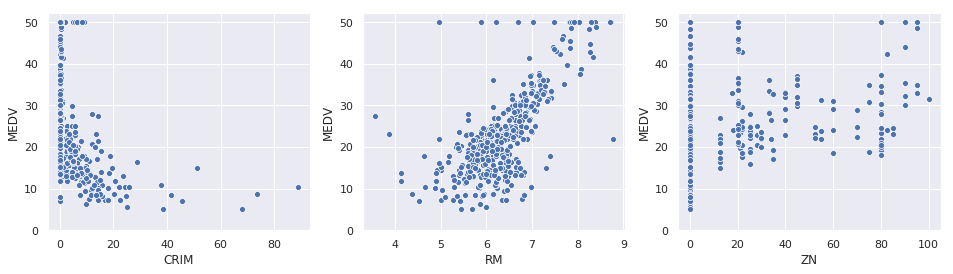

In [12]:
fig, axs = plt.subplots(ncols=3,figsize=(16,4))

for i, var in enumerate(['CRIM', 'RM', 'ZN']):
    lm = sns.scatterplot(X[var], y, ax = axs[i])
#    lm = sns.regplot(X[var], y, ax = axs[i])
    lm.set(ylim=(0, None))

## Lineare Regression mit einem Feature

### Feature setzen

In [13]:
feature = 'ZN'

### Trainings- und Testdaten auf das Feature reduzieren

In [14]:
X_train_one_feature = np.array(X_train[feature].copy()).reshape(-1,1)
X_test_one_feature = np.array(X_test[feature].copy()).reshape(-1,1)

### Model erzeugen

In [15]:
model = LinearRegression()

### Model trainieren

In [16]:
model.fit(X_train_one_feature, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Preise für Testdaten vorhersagen

In [17]:
predictions = model.predict(X_test_one_feature)

In [18]:
predictions[:5]

array([20.72257099, 20.72257099, 20.72257099, 20.72257099, 20.72257099])

In [19]:
reg_line = compute_line(X_train[feature], model)

In [20]:
reg_line

array([20.72257099, 20.88275595, 21.0429409 , 21.20312586, 21.36331082,
       21.52349577, 21.68368073, 21.84386569, 22.00405065, 22.1642356 ,
       22.32442056, 22.48460552, 22.64479047, 22.80497543, 22.96516039,
       23.12534534, 23.2855303 , 23.44571526, 23.60590022, 23.76608517,
       23.92627013, 24.08645509, 24.24664004, 24.406825  , 24.56700996,
       24.72719492, 24.88737987, 25.04756483, 25.20774979, 25.36793474,
       25.5281197 , 25.68830466, 25.84848961, 26.00867457, 26.16885953,
       26.32904449, 26.48922944, 26.6494144 , 26.80959936, 26.96978431,
       27.12996927, 27.29015423, 27.45033919, 27.61052414, 27.7707091 ,
       27.93089406, 28.09107901, 28.25126397, 28.41144893, 28.57163388,
       28.73181884, 28.8920038 , 29.05218876, 29.21237371, 29.37255867,
       29.53274363, 29.69292858, 29.85311354, 30.0132985 , 30.17348345,
       30.33366841, 30.49385337, 30.65403833, 30.81422328, 30.97440824,
       31.1345932 , 31.29477815, 31.45496311, 31.61514807, 31.77

In [21]:
model.coef_

array([0.16018496])

### Regressionslinie und Vorhersagen plotten

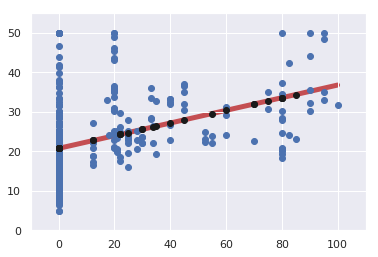

In [22]:
plot_reg(X_train[feature], X_test[feature], y_train, y_test, predictions, reg_line)

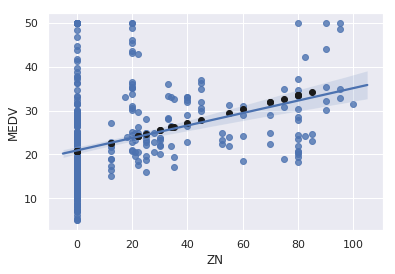

In [23]:
sns.regplot(X[feature], y)
plt.scatter(X_test[feature], predictions, color='k')

## Fehler berechnen

In [24]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse).round(2)
rmse

9.2

## Lineare Regression mit mehr als einem Feature

In [25]:
features = ['ZN', 'PTRATIO']

In [26]:
X_train_multiple_features = X_train[features].copy()
X_test_multiple_features = X_test[features].copy()

In [27]:
model = LinearRegression()
model.fit(X_train_multiple_features, y_train)
predictions = model.predict(X_test_multiple_features)

In [28]:
predictions[:5]

array([24.72271274, 18.11241228, 25.72427341, 18.11241228, 21.1170943 ])

In [29]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse).round(2)
rmse

9.11

---

## Aufgaben

### Wie groß ist der Fehler, wenn nur das Feature **RM** berücksichtigt wird?

### Wie groß ist der Fehler, wenn nur die Features **RM** und **LSTAT** berücksichtigt werden?